In [12]:
import os, glob, random, yaml, cv2
import matplotlib.pyplot as plt

# 👇 Because dataset is two levels above your notebook folder
DATASET_ROOT = "../../dataset"

# Inside that, images and labels
TRAIN_IMAGES = os.path.join(DATASET_ROOT, "images")
TRAIN_LABELS = os.path.join(DATASET_ROOT, "labels")

print("Images path:", TRAIN_IMAGES)
print("Labels path:", TRAIN_LABELS)
print("Images exist:", os.path.exists(TRAIN_IMAGES))
print("Labels exist:", os.path.exists(TRAIN_LABELS))





Images path: ../../dataset\images
Labels path: ../../dataset\labels
Images exist: True
Labels exist: True


Image: ../../dataset\images\Match-dataset-clip-1_mp4-859_jpg.rf.9eae42396392e374e40ce32ed79f9f2a.jpg
Label: ../../dataset\labels\Match-dataset-clip-1_mp4-859_jpg.rf.9eae42396392e374e40ce32ed79f9f2a.txt Exists: True


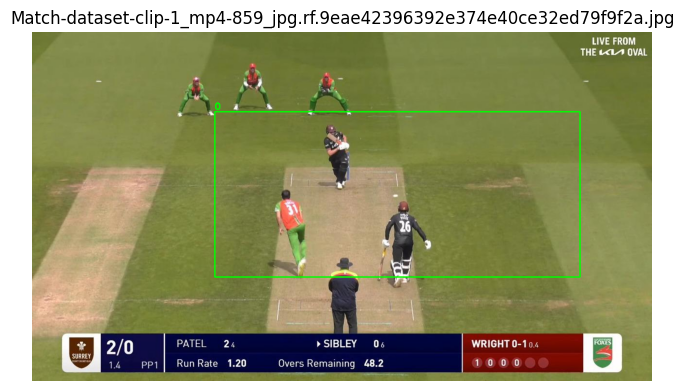

In [14]:
def yolo_to_bbox(line, img_w, img_h):
    parts = line.strip().split()
    if len(parts) < 5:
        return None
    cls = int(float(parts[0]))
    xc, yc, bw, bh = map(float, parts[1:5])
    x1 = int((xc - bw/2) * img_w)
    y1 = int((yc - bh/2) * img_h)
    x2 = int((xc + bw/2) * img_w)
    y2 = int((yc + bh/2) * img_h)
    return cls, x1, y1, x2, y2


img_files = glob.glob(os.path.join(TRAIN_IMAGES, "*.jpg")) + glob.glob(os.path.join(TRAIN_IMAGES, "*.png"))
assert len(img_files) > 0, f"No images found in {TRAIN_IMAGES}"

img_path = random.choice(img_files)
label_path = os.path.join(TRAIN_LABELS, os.path.basename(img_path).rsplit(".",1)[0] + ".txt")

print("Image:", img_path)
print("Label:", label_path, "Exists:", os.path.exists(label_path))

img = cv2.imread(img_path)
h, w = img.shape[:2]

if os.path.exists(label_path):
    with open(label_path, 'r') as f:
        for line in f:
            parsed = yolo_to_bbox(line, w, h)
            if parsed:
                cls, x1, y1, x2, y2 = parsed
                cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
                cv2.putText(img, str(cls), (x1, max(10,y1-5)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

plt.figure(figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(os.path.basename(img_path))
plt.show()





In [15]:
from ultralytics import YOLO
YOLO().info()


Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\DELL\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
YOLO11n summary: 181 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(181, 2624080, 0, 6.614336)

In [16]:
import ultralytics
print(ultralytics.__version__)


8.3.224


In [1]:
from ultralytics import YOLO
import cv2

# Load trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Run detection on a sample image
results = model.predict(source="dataset/test/images", show=True, conf=0.25)


FileNotFoundError: [Errno 2] No such file or directory: 'runs\\detect\\train3\\weights\\best.pt'

In [2]:
from ultralytics import YOLO

model_path = r"C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt"
model = YOLO(model_path)

print("✅ Model Loaded Successfully from:", model_path)


✅ Model Loaded Successfully from: C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt


In [3]:
results = model.predict(source="dataset/test/images", show=True, conf=0.25)
print("✅ Detection completed successfully!")


FileNotFoundError: dataset/test/images does not exist

In [ ]:
from ultralytics import YOLO

# Load trained model (best.pt)
model_path = r"C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt"
model = YOLO(model_path)

# Correct image folder path
image_folder = r"C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images"

# Run detection
results = model.predict(source=image_folder, show=True, conf=0.25)

print("✅ Detection Completed Successfully!")



WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-dataset-clip-1_mp4-0_jpg.rf.d3df4b14a9b17fadd48963dfefed7b45.jpg: 384x640 (no detections), 172.0ms
image 2/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-dataset-clip-1_mp4-1000_jpg.rf.18facbdc3179914197bc1ca7b4b9a5e0.jpg: 384x640 (no detections), 140.2ms
image 3/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-dataset-clip-1_mp4-1001_jpg.rf

In [3]:
from ultralytics import YOLO

# Load your trained YOLO model
model = YOLO(r"C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt")

print("✅ Model loaded successfully!")
results = model.predict(
    source=r"C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images",
    conf=0.25,
    save=True
)

print("✅ All predictions saved inside 'runs/detect/predict'")


✅ Model loaded successfully!

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-dataset-clip-1_mp4-0_jpg.rf.d3df4b14a9b17fadd48963dfefed7b45.jpg: 384x640 (no detections), 205.1ms
image 2/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-dataset-clip-1_mp4-1000_jpg.rf.18facbdc3179914197bc1ca7b4b9a5e0.jpg: 384x640 (no detections), 130.7ms
image 3/1016 C:\Users\DELL\Desktop\SportVot_AI_Project\dataset\images\Match-d

In [6]:
from ultralytics import YOLO
from sort import Sort
import cv2
import numpy as np


# Load model
model = YOLO(r"C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt")

# Initialize tracker
tracker = Sort()

# Video input
cap = cv2.VideoCapture("sample_video.mp4")  # Replace with your file name

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    detections = []

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        confs = r.boxes.conf.cpu().numpy()
        for box, conf in zip(boxes, confs):
            if conf > 0.3:
                detections.append([*box, conf])

    detections = np.array(detections)
    tracks = tracker.update(detections)

    # Draw tracking boxes
    for t in tracks:
        x1, y1, x2, y2, track_id = t
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
        cv2.putText(frame, f"Ball ID {int(track_id)}", (int(x1), int(y1)-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    cv2.imshow("Tracking", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


ModuleNotFoundError: No module named 'sort'

In [7]:
from ultralytics import YOLO
from sort import Sort
import cv2
import numpy as np

# 1️⃣ Load your trained YOLO model
model = YOLO(r"C:\Users\DELL\Desktop\SportVot_AI_Project\runs\detect\train3\weights\best.pt")

# 2️⃣ Initialize SORT tracker
tracker = Sort(max_age=10, min_hits=3, iou_threshold=0.3)

# 3️⃣ Load your input video
video_path = r"C:\Users\DELL\Desktop\SportVot_AI_Project\sample_video.mp4"  # change if needed
cap = cv2.VideoCapture(video_path)

# 4️⃣ Prepare video writer to save output
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('tracked_output.mp4', fourcc, 30.0, 
                      (int(cap.get(3)), int(cap.get(4))))

# 5️⃣ Process video frame by frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # YOLO detection
    results = model(frame, stream=True)
    detections = []

    for r in results:
        boxes = r.boxes.xyxy.cpu().numpy()
        confs = r.boxes.conf.cpu().numpy()
        for box, conf in zip(boxes, confs):
            if conf > 0.3:  # confidence threshold
                detections.append([*box, conf])

    # Convert detections to numpy array
    detections = np.array(detections)
    tracks = tracker.update(detections)

    # Draw tracking boxes
    for t in tracks:
        x1, y1, x2, y2, track_id = t
        cv2.rectangle(frame, (int(x1), int(y1)), (int(x2), int(y2)), (0,255,0), 2)
        cv2.putText(frame, f"Ball ID: {int(track_id)}", (int(x1), int(y1)-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    # Write and show frame
    out.write(frame)
    cv2.imshow("Ball Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 6️⃣ Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()

print("✅ Tracking complete! Output saved as tracked_output.mp4")


ModuleNotFoundError: No module named 'sort'

In [1]:
from ultralytics import YOLO
import cv2
from sort import Sort
import numpy as np

# Initialize model and tracker
model = YOLO(r"runs\detect\train3\weights\best.pt")  # apna trained model path
tracker = Sort()

# Load video (sample video rakha ho project folder me)
video_path = r"sample_video.mp4"
cap = cv2.VideoCapture(video_path)

# Output video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('tracked_output.mp4', fourcc, 30.0,
                      (int(cap.get(3)), int(cap.get(4))))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Predict with YOLO
    results = model.predict(frame, conf=0.4, verbose=False)
    detections = []

    for box in results[0].boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = box.conf[0].item()
        cls = int(box.cls[0].item())
        detections.append([x1, y1, x2, y2, conf])

    detections = np.array(detections)
    tracks = tracker.update(detections)

    # Draw tracking boxes
    for track in tracks:
        x1, y1, x2, y2, track_id = map(int, track)
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID {track_id}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    out.write(frame)
    cv2.imshow("Tracking", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
out.release()
cv2.destroyAllWindows()
print("✅ Tracking completed! Output saved as tracked_output.mp4")


ModuleNotFoundError: No module named 'sort'